In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy import optimize
from scipy import fft
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [2]:
max_speeds = np.load('data/max-speeds.npy')
years_nb = max_speeds.shape[0]
years = np.arange(years_nb)+1
print(max_speeds)

[28.09 22.46 26.65 26.65 28.79 30.19 26.19 26.75 23.34 24.16 29.75 27.93
 26.68 23.85 32.97 25.79 26.37 25.28 26.73 23.2  26.76]


In [3]:
cprob = years/(years_nb+1)
max_speeds_sorted = np.sort(max_speeds)
k = 3
quantile_func = UnivariateSpline(cprob, max_speeds_sorted, k = k)
fifty_prob = 1. - 0.02
fifty_wind = quantile_func(fifty_prob)
print('Wind speed at 2% quantile: ', fifty_wind)

Wind speed at 2% quantile:  32.97989844019469


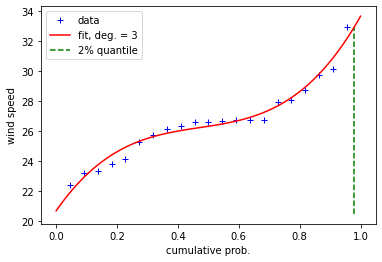

In [4]:
xx = np.linspace(0,1,100)
plt.plot(cprob, max_speeds_sorted, 'b+', label = 'data')
plt.plot(xx, quantile_func(xx), color = 'r', label = 'fit, deg. = ' + str(k))
plt.vlines(x=1-0.02, ymin = 20.5, ymax = fifty_wind, linestyle = 'dashed', color = 'g', label = '2% quantile')
plt.xlabel('cumulative prob.')
plt.ylabel('wind speed')
plt.legend()
plt.show()

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

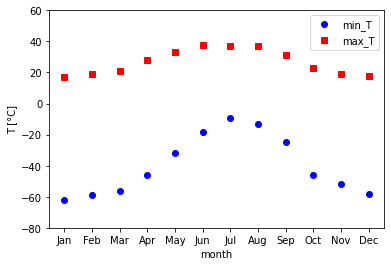

In [5]:
max_T = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_T = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months_n = np.arange(12)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots()
ax.plot(months_n, min_T, 'bo', label = 'min_T')
ax.plot(months_n, max_T, 'rs', label = 'max_T')
plt.xticks(ticks = months_n, labels = months)
ax.set_xlabel('month')
ax.set_ylabel('T [°C]')
ax.set_ylim(-80, 60)
ax.legend()
plt.show()

In [6]:
def func(x, A, B, C, D):
    return A*np.sin(B*(x+C))+D

In [7]:
params_min, params_cov_min = optimize.curve_fit(func, months_n, min_T, p0 = [20, 0.1, 1, -40])
print(params_min)
print (params_cov_min)

[ 25.14961986   0.60132092  -3.52075181 -36.71256508]
[[ 1.72807270e+00 -2.48037412e-04 -7.96047119e-03  1.89195677e-01]
 [-2.48037412e-04  5.30711963e-04 -1.92972381e-03  1.60001097e-02]
 [-7.96047119e-03 -1.92972381e-03  1.58020362e-02 -5.29742277e-02]
 [ 1.89195677e-01  1.60001097e-02 -5.29742277e-02  1.41859135e+00]]


In [8]:
params_max, params_cov_max = optimize.curve_fit(func, months_n, max_T, p0 = [10, 0.1, 1, 30])
print(params_max)
print (params_cov_max)

[10.58169952  0.59227425 -3.07063124 27.94963548]
[[ 0.16816409 -0.00085879  0.00292309  0.00655407]
 [-0.00085879  0.00044871 -0.00191819  0.00640262]
 [ 0.00292309 -0.00191819  0.01332307 -0.0269721 ]
 [ 0.00655407  0.00640262 -0.0269721   0.18339506]]


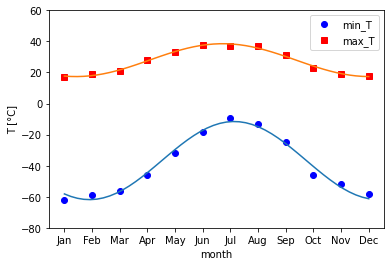

In [9]:
xx = np.linspace(0, 11, 48)
fig, ax = plt.subplots()
ax.plot(months_n, min_T, 'bo', label = 'min_T')
ax.plot(months_n, max_T, 'rs', label = 'max_T')
ax.plot(xx, func(xx, params_min[0], params_min[1],params_min[2],params_min[3]))
ax.plot(xx, func(xx, params_max[0], params_max[1],params_max[2],params_max[3]))

plt.xticks(ticks = months_n, labels = months)
ax.set_xlabel('month')
ax.set_ylabel('T [°C]')
ax.set_ylim(-80, 60)
ax.legend()
plt.show()

In [10]:
#Look at the periods
T_min = 2*np.pi/params_min[1]
T_max = 2*np.pi/params_max[1]
err_T_min = T_min/params_min[1]*params_cov_min[1,1]**0.5
err_T_max = T_max/params_max[1]*params_cov_max[1,1]**0.5
print("max_T period = %.1f +/- %.1f" %(T_max, err_T_max))
print("min_T period = %.1f +/- %.1f" %(T_min, err_T_min))
l = abs(T_max-T_min)/(err_T_max**2+err_T_min**2)**0.5
print("Compatibility = %.2f" %l)

max_T period = 10.6 +/- 0.4
min_T period = 10.4 +/- 0.4
Compatibility = 0.29


Note that the periods computed by the fit procedure are compatible between each other but they differ from what we expected: the periodicity seems not to be an exact year (T = 12). The whole procedure can be repeated fixing the period parameter and obtaining new parameters. Fixing one of the four parameter can lead to a worse fit, but the results can be better. In order to choose which fit is more appropriate we need to select an hypothesis: does the temperature cycle have a fixed period of one year? or maybe it is better to let the frequence as a parameter to be checked?

In [11]:
print("max_T offset = %.1f +/- %.1f" %(params_max[2], params_cov_max[2,2]**0.5))
print("min_T offset = %.1f +/- %.1f" %(params_min[2], params_cov_min[2,2]**0.5))

max_T offset = -3.1 +/- 0.1
min_T offset = -3.5 +/- 0.1


In [12]:
l = abs(params_max[2]-params_min[2])/(params_cov_max[2,2]+params_cov_min[2,2])**0.5
print("Compatibility = %.2f" %l)

Compatibility = 2.64


The time offset parameters can be considered compatible between each other, but the compatibility is not optimal.

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


In [13]:
def f(x):
    return (4-2.1*x[0]**2+x[0]**4/3)*x[0]**2 + x[0]*x[1] +(4*x[1]**2 - 4)*x[1]**2

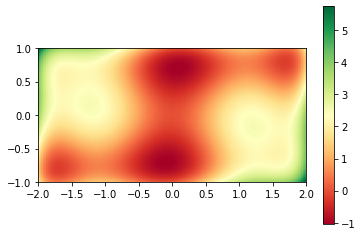

In [14]:
xx = np.linspace(-2, 2, 100)
yy = np.linspace(-1, 1, 100)
grid = np.meshgrid(xx, yy)
z = f(grid)
fig, ax = plt.subplots()
im = ax.imshow(z, extent=[-2, 2, -1, 1], cmap='RdYlGn')
fig.cbar = plt.colorbar(im)
plt.show()

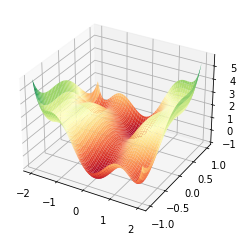

In [15]:
fig = plt.figure()
X, Y = grid
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, z, cmap='RdYlGn' )
ax.view_init(30,-60)
plt.show()

In [16]:
optimize.minimize(f, x0 = [0.1, -0.3], bounds =((-2,2), (-1, 1)))

      fun: -1.0316284534893427
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.90958360e-06, 3.48610028e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 30
      nit: 7
     njev: 10
   status: 0
  success: True
        x: array([ 0.08984223, -0.71265621])

In [17]:
optimize.minimize(f, x0 = [-0.1, 0.3], bounds =((-2,2), (-1, 1)))

      fun: -1.0316284534892899
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.93178806e-06, -3.48610028e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 30
      nit: 7
     njev: 10
   status: 0
  success: True
        x: array([-0.08984224,  0.7126562 ])

In [18]:
optimize.minimize(f, x0 = [0,0], bounds =((-2,2), (-1, 1)))

      fun: 0.0
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.e-08, -4.e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])

In [19]:
optimize.minimize(f, x0 = [0,0], bounds =((-2,2), (-1, 1)), method = 'Powell')

   direc: array([[ 0.00000000e+00,  1.00000000e+00],
       [ 7.06009542e-04, -4.36601675e-05]])
     fun: -1.0316284528994617
 message: 'Optimization terminated successfully.'
    nfev: 72
     nit: 3
  status: 0
 success: True
       x: array([ 0.089842  , -0.71266489])

As can be seen from th plot the function has two global minima. The minimize function with the deafult method manages to find one of these two minima (0.090, -0.713) and (-0.090, 0.713) from an arbitrary point except from the origin (0, 0) which is a saddle point. In that case the algorithm is stuck in (0,0). Changing the method to 'Powell', also the saddle point converge.

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

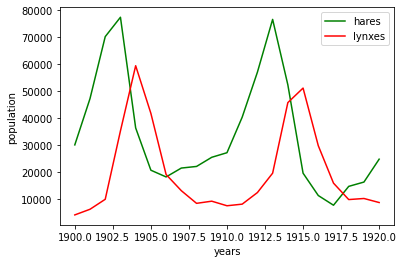

In [20]:
Data = np.loadtxt('data/populations.txt')
years, hares, lynxes, carrots = Data.T
plt.plot(years, hares, color = 'g', label = 'hares')
plt.plot(years, lynxes, color = 'r', label = 'lynxes')
plt.xlabel('years')
plt.ylabel('population')
plt.legend()
plt.show()

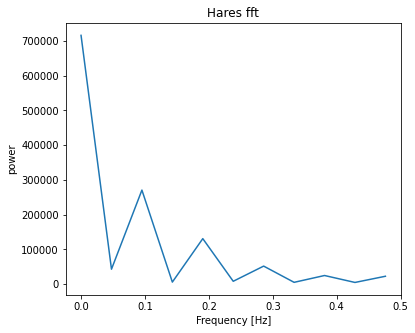

In [21]:
hares_fft = fft.rfft(hares)
power= np.abs(hares_fft)
sample_freq = fft.rfftfreq(hares.size, d=1)

plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')
plt.title('Hares fft')
plt.show()

In [22]:
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]
print("Principal frequency: ", peak_freq)
print("Period", 1/peak_freq)

Principal frequency:  0.09523809523809523
Period 10.5


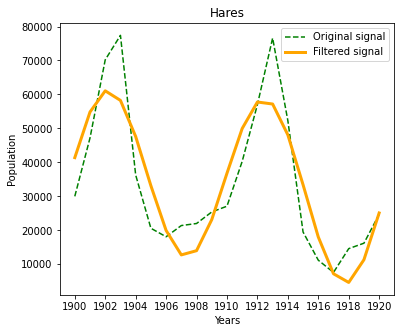

In [23]:
high_freq_fft = hares_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fft.irfft(high_freq_fft, len(hares))

fig, ax = plt.subplots(figsize = (6,5))
ax.set_title('Hares')
ax.plot(years, hares,label='Original signal', linestyle = 'dashed', color = 'g')
ax.plot(years, filtered_sig, linewidth=3, label='Filtered signal', color = 'orange')
plt.legend()
ax.set_xlabel('Years')
ax.set_ylabel('Population')
ax.xaxis.set_major_locator(MultipleLocator(2.000))

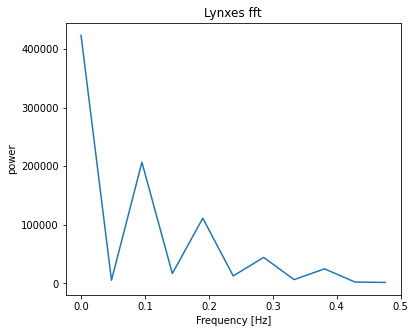

In [24]:
lynxes_fft = fft.rfft(lynxes)
power = np.abs(lynxes_fft)
sample_freq = fft.rfftfreq(lynxes.size, d=1)

plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')
plt.title('Lynxes fft')
plt.show()

In [25]:
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]
print("Principal frequency: ", peak_freq)
print("Period", 1/peak_freq)

Principal frequency:  0.09523809523809523
Period 10.5


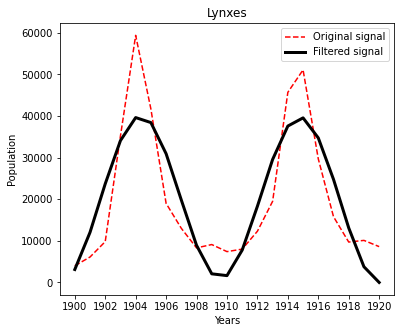

In [26]:
high_freq_fft = lynxes_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fft.irfft(high_freq_fft, len(lynxes))

fig, ax = plt.subplots(figsize = (6,5))
ax.set_title('Lynxes')
ax.plot(years, lynxes, label='Original signal', linestyle = 'dashed', color = 'r')
ax.plot(years, filtered_sig, linewidth=3, label='Filtered signal', color = 'k')
ax.set_xlabel('Years')
ax.set_ylabel('Population')
plt.legend()
ax.xaxis.set_major_locator(MultipleLocator(2.000))

The fft algorithm was performed in for the lynxes and hares datasets, preserving only the DC term (responsible for the offset of the signal) and the first frequency. With this sampling (only few points) the smallest frequency of the two datasets coincides.

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

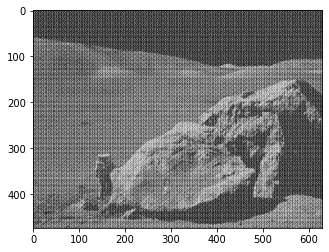

<Figure size 432x360 with 0 Axes>

In [27]:
Data = plt.imread('images/moonlanding.png')
plt.imshow(Data, cmap = 'gray')
plt.figure(figsize=(6, 5))
plt.show()

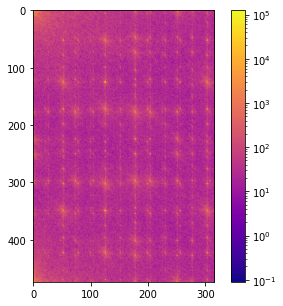

In [28]:
FData = fft.rfft2(Data)
power= np.abs(FData)
plt.figure(figsize=(6, 5))
plt.imshow(power, norm=LogNorm(vmin = power.min(), vmax = power.max()), cmap = 'plasma')
plt.colorbar()
plt.show()

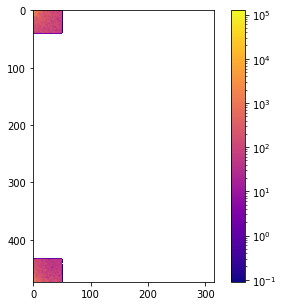

In [29]:
newFData = FData.copy()

#Threshold for selection
fx = 50
fy = 40

newFData[:, fx:] = 0
newFData[fy:-fy, :] = 0
newpower = np.abs(newFData)
plt.figure(figsize=(6, 5))
plt.imshow(newpower, norm=LogNorm(vmin = power.min(), vmax = power.max()), cmap = 'plasma')
plt.colorbar()
plt.show()

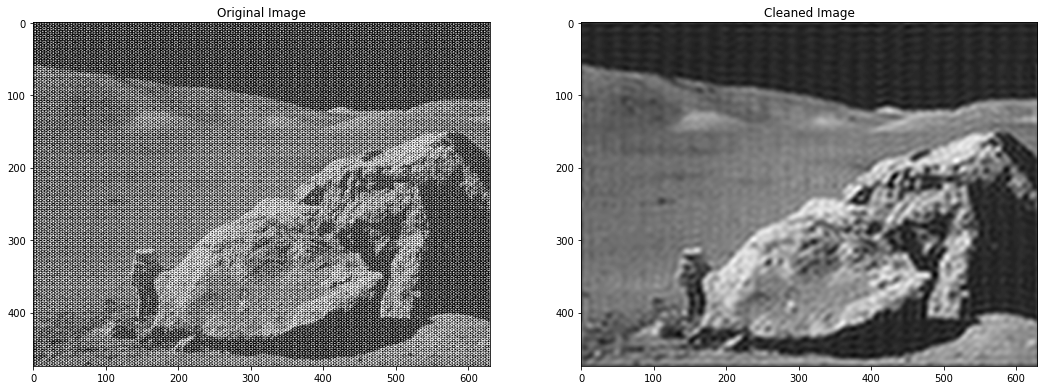

In [30]:
newData = fft.irfft2(newFData).real
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(18,9))
ax1.imshow(Data, cmap = plt.cm.gray)
ax1.set_title('Original Image')
ax2.imshow(newData, cmap = plt.cm.gray)
ax2.set_title('Cleaned Image')
plt.show()

In the cleaned image we kept only the small frequencies. In the frequency map the smallest frequencies are in the corners selected.